Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


Dataset Size: (100, 2)
[{'x': 0.8924614795351706, 'y': 0.8005706094982953}, {'x': 0.44299156896881414, 'y': 0.4708727861139604}, {'x': 0.7584176260448832, 'y': 0.9852159427873427}, {'x': 0.3896065159721525, 'y': 0.29852555326272456}]
Iteration 1
Error:  17.3203511695767
Centroids: 
[0.8924614795351706, 0.44299156896881414, 0.7584176260448832, 0.3896065159721525] [0.8005706094982953, 0.4708727861139604, 0.9852159427873427, 0.29852555326272456]


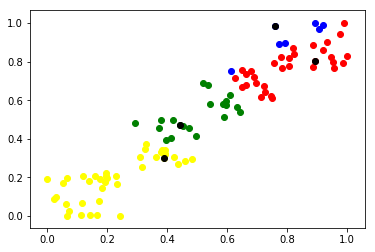

Iteration 2
Error:  14.567404555790588
Centroids: 
[0.19188534672940352, 0.45254241713969384, 0.7135198927203537, 0.3833177720505484] [0.17469716143153838, 0.464906410800865, 0.6157206649173006, 0.3411065942275929]


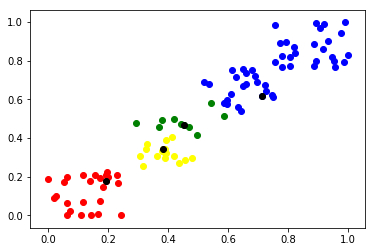

Iteration 3
Error:  13.598247184525926
Centroids: 
[0.18215624333683386, 0.027075799549786075, 0.6614941734622908, 0.3911520125415765] [0.14507731510886376, 0.09871926795082923, 0.6772458816451858, 0.34425922034541895]


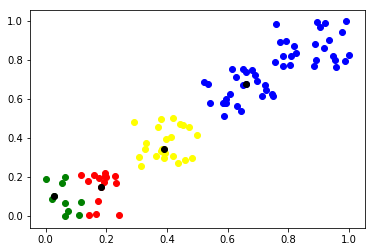

Iteration 4
Error:  12.8614960342257
Centroids: 
[0.19188534672940352, 0.1110037275412803, 0.6954563849477067, 0.3911520125415765] [0.17469716143153838, 0.0033278537566326554, 0.6911978303857074, 0.34425922034541895]


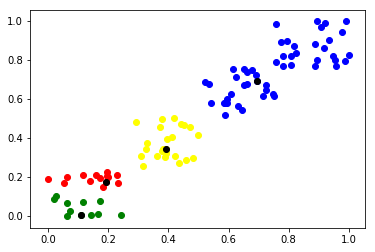

Iteration 5
Error:  12.648073437647318
Centroids: 
[0.174408626634951, 0.07190234565946918, 0.6911084339881313, 0.3911520125415765] [0.19111208238671865, 0.023835089287213326, 0.7201783331297937, 0.34425922034541895]


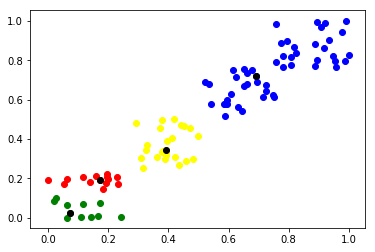

Iteration 6
Error:  10.635417236448403
Centroids: 
[0.9778559892376311, 0.19188534672940352, 0.6614941734622908, 0.3911520125415765] [0.9416928579877525, 0.17469716143153838, 0.6772458816451858, 0.34425922034541895]


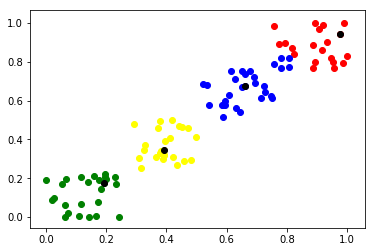

Iteration 7
Error:  10.000560078787348
Centroids: 
[0.8079313790930407, 0.18215624333683386, 0.6503329506960656, 0.3911520125415765] [0.8178355768648639, 0.14507731510886376, 0.6707524889235524, 0.34425922034541895]


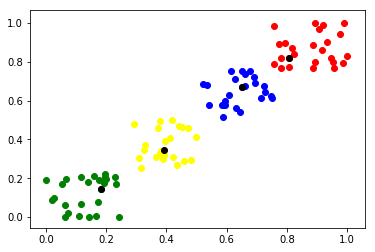

Iteration 8
Error:  9.82921584328025
Centroids: 
[0.8924614795351706, 0.14028486101000406, 0.6503329506960656, 0.3911520125415765] [0.8005706094982953, 0.17978397656673015, 0.6707524889235524, 0.34425922034541895]


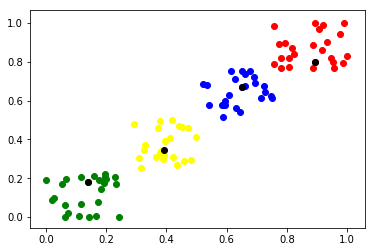

Iteration 9
Error:  9.612083503627701
Centroids: 
[0.8876256324778347, 0.14028486101000406, 0.6503329506960656, 0.3911520125415765] [0.883923516421647, 0.17978397656673015, 0.6707524889235524, 0.34425922034541895]


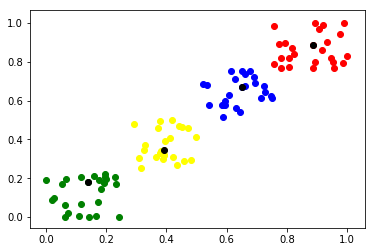

          x         y
0  0.191885  0.174697
1  0.027076  0.098719
2  0.117530  0.209008
3  0.173476  0.075840


In [2]:
%reset

import pandas as pd
import numpy as np
import random
import math
import copy
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
random.seed(5)
%matplotlib inline

def getData(dataset_name):
    attribute_file_name = 'Data/'+dataset_name+".attribute"
    dataset_file_name = 'Data/'+dataset_name+".data"
    att = pd.read_csv(attribute_file_name,
                      delim_whitespace=True,
                     header = None)
    attributes = {rows[0]:rows[1] for _,rows in att.iterrows()}
    dataset = pd.read_csv(dataset_file_name,
                      names=list(attributes.keys()))
    if 'class' in attributes: 
        del attributes['class']; del dataset['class']
    return attributes, dataset


def dist(x1,x2, minkowski = 2):
    val = 0.0
#     print("In error: ",attributes)
    for att in attributes:
        if attributes[att]=='value':
            val += (x1[att] - x2[att])*(x1[att] - x2[att])
    val = math.sqrt(val)
    return val

# def calculateError(curr_centroids):
#     error = 0
#     sqrt_error = 0
#     for i in range(len(dataset)):
#         sqrt_error += dist(dataset.iloc[i], pd.DataFrame(curr_centroids[cluster_index[i]],index=[0]))**2
#         error += dist(dataset.iloc[i], pd.DataFrame(curr_centroids[cluster_index[i]],index=[0]))
#     print("Error:",error,"Squared Error:", sqrt_error)
#     return sqrt_error


def assignCluster(curr_centroids):
    new_cluster_index = [-1]*len(dataset)
    total_error = 0
#     flag = False
    for i in range(len(dataset)):
        min_val = math.inf
        min_idx = -1
        for j in range(len(curr_centroids)):
            distance = dist(dataset.iloc[i], pd.DataFrame(curr_centroids[j],index=[0]))
            if distance < min_val:
                min_val = distance
                min_idx = j
#         if flag==False and cluster_index[i] != min_idx:
#             flag = True
        new_cluster_index[i] = min_idx
        total_error += abs(min_val)
    return new_cluster_index, total_error


def showGraph(loop_num):
    x = []
    y = []
    color = ["red","green", "blue", "yellow", "black"]
    for i in range(len(centroids)+1):
        x.append([])
        y.append([])
    for i in range(len(dataset)):
        x[cluster_index[i]].append(dataset.iloc[i]['x'])
        y[cluster_index[i]].append(dataset.iloc[i]['y'])
    for i in range(len(centroids)):
        x[len(centroids)].append(centroids[i]['x'])
        y[len(centroids)].append(centroids[i]['y'])
    for i in range(len(centroids)):
        plt.scatter(x[i],y[i],color=color[i])
    print("Centroids: ")
    print(x[-1],y[-1])
    
    plt.scatter(x[-1],y[-1],color="black")
    filename = "fig_"+str(loop_num)+".png"
#     print(filename)
    plt.savefig(filename)
    plt.show()



dataset_name = 'test'
k = 4

attributes, dataset = getData(dataset_name)
dataset = dataset.dropna()
print("Dataset Size:",dataset.shape)
min_max_scaler = MinMaxScaler()
value_attributes = [key for key,value in attributes.items() if value=='value']
dataset[value_attributes] = min_max_scaler.fit_transform(dataset[value_attributes])

centroids = []
# cluster_index = [-1]*len(dataset)
# print(cluster_index)
for i in range (k): 
    centroid = {}
    random_number = random.randint(0,len(dataset))
    centroids.append(dict(dataset.iloc[random_number]))

print(centroids)
cluster_index, total_error = assignCluster(centroids)
# error = calculateError(centroids)




L = 0
while L<10:
    L +=1
    print("Iteration",L)
    print("Error: ",total_error)
    showGraph(L)
    Flag = False
    prev_centroids = copy.deepcopy(centroids)
    for i in range(k):
        for j in range (len(dataset)):
            #optimaize
            new_centroids = copy.deepcopy(centroids)
#             print(new_centroids[0])
#             new_centroids[i] = "ABC"
#             print(new_centroids)
#             print(dict(dataset.iloc(j)))
            new_centroids[i] = dict(dataset.iloc[j])
            new_cluster_index, new_total_error = assignCluster(new_centroids)
            if (new_total_error < total_error):
                total_error = new_total_error
                cluster_index = copy.deepcopy(new_cluster_index)
                centroids = copy.deepcopy(new_centroids)
                Flag = True
                break
    if Flag==False:
        break
print(dataset.head(4))

In [ ]:
print("বাংলা")